In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
PLOT_ERR_BARS = True

In [4]:
res = pickle.load(open("eval_results.p", "rb"))

In [5]:
res.keys()

dict_keys(['Watson-vgg', 'Watson-fft [LA]', 'L2 [LA]', 'Watson-dct', 'Watson-vgg [LA]', 'SSIM', 'SSIM [LA]', 'L1 [LA]', 'Deeploss-vgg', 'Human', 'Watson-fft', 'Deeploss-vgg [LA]', 'L2', 'L1', 'Watson-dct [LA]', 'Deeploss-squeeze', 'Deeploss-squeeze [LA]', 'Adaptive [LA]', 'Adaptive'])

In [45]:
def make_barplot(display_names, means, errors, title=None, colors=None, labels=None, figsize=(7,5), legend='outside'):
    x_pos = np.arange(len(display_names))
    
    #print results
    s = ""
    for (name, score, error) in zip(display_names, means, errors):
        s += '{}: {:04.1f} +/- {:04.1f}\n'.format(name, score, error)
    print(s)
    
    if colors is None:
        # make dummy colors
        colors = [None] * len(display_names)
    if labels is None:
        # make dummy labels
        labels = [None] * len(display_names)
        
    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    for i in range(len(display_names)):
        yerr = errors[i] if PLOT_ERR_BARS else None
        ax.bar(x_pos[i], means[i], yerr=yerr, align='center', color=colors[i], label=labels[i], alpha=0.6, ecolor='#444444', capsize=10)
    ax.set_ylabel('2AFC score [%]')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(display_names, rotation='vertical')
    
    min_val = 35 if np.min(means) > 35 else np.min(means) - 5
    max_val = max(means + errors)
    max_val = max_val // 5 * 5 + 5
    
    ax.set_ylim(min_val, max_val)
    if title is not None:
        ax.set_title(title)
    #ax.yaxis.grid(True)
    plt.subplots_adjust(bottom=0.15)
    
    
    # rotate labels
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=60, ha="right", rotation_mode="anchor") 
    
    if legend=='outside':
        plt.legend(loc=4, ncol=1)
        ax.legend(bbox_to_anchor=(1., 1.))
    elif legend=='inside':
        plt.legend(loc=4, ncol=2, prop={'size': 9})

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot_with_error_bars.png')
    #plt.show()

In [7]:
def set_bar_color(model_name):
    if 'Human' in model_name:
        return '#000000'
    
    if 'Deeploss' in model_name:
        if '[LA]' in model_name:
            return 'lightgrey'
        else:
            return '#8c2b2b'
    
    if 'L1' in model_name \
        or 'L2' in model_name \
        or 'SSIM' in model_name \
        or 'Adaptive' in model_name:
        
        if "[LA]" in model_name:
            # not ours and grayscale
            return 'darkgrey'#'#00006e'
        else:
            # not ours and rgb
            return 'firebrick'#'#6e0000'
    else:
        if "[LA]" in model_name:
            # ours and grayscale
            return 'dimgrey' 
        else:
            # ours and rgb
            return '#FF0000'
    
    return '#FF0000'

def plot_results(results, per_dataset=False, datasets=None, order=None, labels=None, display_names=None, title=None, legend='outside', figsize=(7,5)):
    # sort
    if order is None:
        models = list(results.keys())
        models = sorted(models)
    else:
        models = order
    
    # data shaping
    if datasets is None:
        datasets = results[models[0]].keys()
    
    means = np.zeros((len(models), len(datasets)))
    errors = np.zeros((len(models), len(datasets)))
    for i, dataset in enumerate(datasets):
        try:
            means[:, i] = [results[model][dataset]['score'] for model in models]
            errors[:, i] = [results[model][dataset]['std']**2 for model in models]
        except:
            print('missing ' + dataset)
        
    # mean over all datasets
    all_means = np.array(means)
    
    means = all_means.mean(axis=1)
    errors = errors.mean(axis=1)
        
    # colors
    colors = [set_bar_color(model) for model in models]
    
    if display_names is None:
        display_names = models
    make_barplot(display_names, means *100, errors * 100, title, colors=colors, labels=labels, legend=legend, figsize=figsize)      
    
    return models, means

Human: 73.7 +/- 03.7
$L_{2}$: 60.5 +/- 10.1
SSIM: 61.5 +/- 09.9
Adaptive-Loss: 60.4 +/- 10.1
Watson-DFT: 63.6 +/- 09.4
LPIPS-VGG: 65.8 +/- 08.6
LPIPS-Squeeze: 66.3 +/- 08.5
$L_{2}$: 62.9 +/- 09.5
SSIM: 63.1 +/- 09.6
Adaptive-Loss: 63.3 +/- 09.4
Watson-DFT: 66.0 +/- 08.7
LPIPS-VGG: 68.9 +/- 07.6
LPIPS-Squeeze: 69.9 +/- 07.2



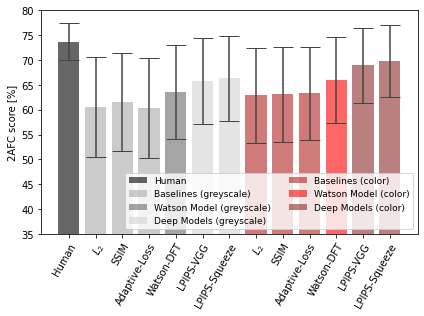

In [55]:
order = ['Human', 'L2 [LA]', 'SSIM [LA]', 'Adaptive [LA]', 'Watson-fft [LA]', 'Deeploss-vgg [LA]', 'Deeploss-squeeze [LA]', 'L2', 'SSIM', 'Adaptive', 'Watson-fft', 'Deeploss-vgg', 'Deeploss-squeeze']
display_names =  ['Human', '$L_{2}$', 'SSIM', 'Adaptive-Loss', 'Watson-DFT', 'LPIPS-VGG', 'LPIPS-Squeeze', '$L_{2}$', 'SSIM', 'Adaptive-Loss', 'Watson-DFT', 'LPIPS-VGG', 'LPIPS-Squeeze']
labels = ['Human', 'Baselines (greyscale)', None, None, 'Watson Model (greyscale)', 'Deep Models (greyscale)', None, 'Baselines (color)', None , None, 'Watson Model (color)', 'Deep Models (color)', None]


_ = plot_results(res, order=order, title=None, per_dataset=False, labels=labels, display_names=display_names, legend='inside', figsize=(6,4.5))
plt.savefig('./plots/2AFC_score_comparison_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_4_paper.png')

Human: 73.7 +/- 03.7
$L_{1}$: 60.8 +/- 10.1
$L_{2}$: 60.5 +/- 10.1
Adaptive: 60.4 +/- 10.1
SSIM: 61.5 +/- 09.9
Watson-DCT: 60.4 +/- 10.1
Watson-DFT: 63.6 +/- 09.4
Deeploss-VGG: 65.8 +/- 08.6
Deep.-Squeeze: 66.3 +/- 08.5
$L_{1}$: 63.3 +/- 09.5
$L_{2}$: 62.9 +/- 09.5
Adaptive: 63.3 +/- 09.4
SSIM: 63.1 +/- 09.6
Watson-DCT: 60.4 +/- 09.9
Watson-DFT: 66.0 +/- 08.7
Deeploss-VGG: 68.9 +/- 07.6
Deep.-Squeeze: 69.9 +/- 07.2



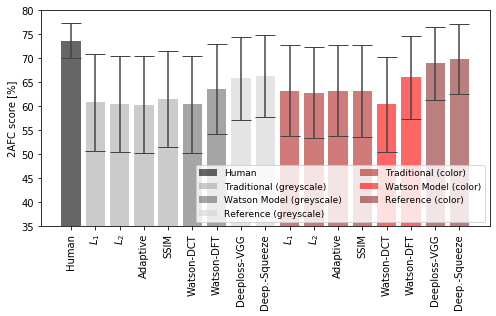

In [12]:
order = ['Human', 'L1 [LA]', 'L2 [LA]', 'Adaptive [LA]', 'SSIM [LA]', 'Watson-dct [LA]', 'Watson-fft [LA]', 'Deeploss-vgg [LA]', 'Deeploss-squeeze [LA]', 'L1', 'L2', 'Adaptive', 'SSIM', 'Watson-dct', 'Watson-fft', 'Deeploss-vgg', 'Deeploss-squeeze']
display_names =  ['Human', '$L_{1}$', '$L_{2}$', 'Adaptive', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'Deeploss-VGG', 'Deep.-Squeeze', '$L_{1}$', '$L_{2}$', 'Adaptive', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'Deeploss-VGG', 'Deep.-Squeeze']
labels = ['Human', 'Traditional (greyscale)', None, None, None, 'Watson Model (greyscale)', None, 'Reference (greyscale)', None, 'Traditional (color)', None, None, None, 'Watson Model (color)', None, 'Reference (color)', None]


_ = plot_results(res, order=order, title=None, per_dataset=False, labels=labels, display_names=display_names, legend='inside', figsize=(7,4.5))
plt.savefig('./plots/2AFC_score_comparison_4_review.pdf')
plt.savefig('./plots/2AFC_score_comparison_4_review.png')

In [56]:
order = ['Human', 'L1 [LA]', 'L2 [LA]', 'Adaptive [LA]', 'SSIM [LA]', 'Watson-dct [LA]', 'Watson-fft [LA]', 'Deeploss-vgg [LA]', 'Deeploss-squeeze [LA]', 'L1', 'L2', 'Adaptive', 'SSIM', 'Watson-dct', 'Watson-fft', 'Deeploss-vgg', 'Deeploss-squeeze']
display_names =  ['Human', '$L_{1}$', '$L_{2}$', 'Adaptive-Loss', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'LPIPS-VGG', 'LPIPS-Squeeze', '$L_{1}$', '$L_{2}$', 'Adaptive-Loss', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'LPIPS-VGG', 'LPIPS-Squeeze']
labels = ['Human', 'Baselines (greyscale)', None, None, None, 'Watson Models (greyscale)', None, 'Deep Models (greyscale)', None, 'Baselines (color)', None, None, None, 'Watson Models (color)', None, 'Deep Models (color)', None]


Human: 82.6 +/- 04.0
$L_{1}$: 65.7 +/- 12.8
$L_{2}$: 64.9 +/- 12.7
Adaptive-Loss: 65.5 +/- 12.5
SSIM: 67.6 +/- 12.3
Watson-DCT: 67.3 +/- 12.4
Watson-DFT: 70.8 +/- 11.4
LPIPS-VGG: 75.5 +/- 09.8
LPIPS-Squeeze: 75.7 +/- 09.6
$L_{1}$: 68.0 +/- 11.9
$L_{2}$: 67.4 +/- 11.8
Adaptive-Loss: 70.5 +/- 11.2
SSIM: 69.7 +/- 11.5
Watson-DCT: 70.3 +/- 11.4
Watson-DFT: 75.1 +/- 09.6
LPIPS-VGG: 79.8 +/- 07.3
LPIPS-Squeeze: 80.1 +/- 07.1



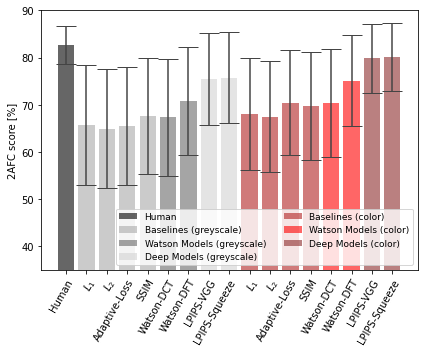

In [57]:
_ = plot_results(res, order=order, datasets=['val/cnn', 'val/traditional'], per_dataset=False, labels=labels, display_names=display_names, legend='inside', figsize=(6,5))
plt.savefig('./plots/2AFC_score_comparison_distortions_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_distortions_4_paper.png')

Human: 69.3 +/- 03.5
$L_{1}$: 58.4 +/- 08.7
$L_{2}$: 58.3 +/- 08.7
Adaptive-Loss: 57.8 +/- 08.8
SSIM: 58.5 +/- 08.7
Watson-DCT: 57.0 +/- 09.0
Watson-DFT: 59.9 +/- 08.4
LPIPS-VGG: 61.0 +/- 08.1
LPIPS-Squeeze: 61.6 +/- 07.9
$L_{1}$: 60.9 +/- 08.4
$L_{2}$: 60.6 +/- 08.4
Adaptive-Loss: 59.7 +/- 08.5
SSIM: 59.8 +/- 08.6
Watson-DCT: 55.5 +/- 09.1
Watson-DFT: 61.5 +/- 08.2
LPIPS-VGG: 63.5 +/- 07.7
LPIPS-Squeeze: 64.8 +/- 07.3



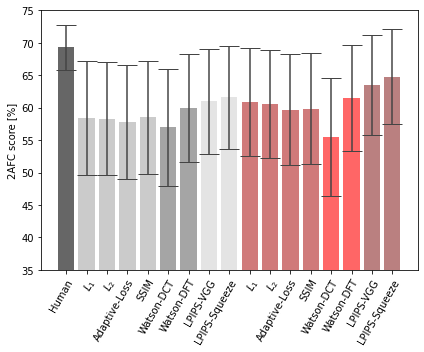

In [58]:
_ = plot_results(res, order=order, datasets=['val/color', 'val/deblur', 'val/superres', 'val/frameinterp'], per_dataset=False, labels=labels, display_names=display_names, legend=None, figsize=(6,5))

plt.savefig('./plots/2AFC_score_comparison_algorithms_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_algorithms_4_paper.png')